<a href="https://colab.research.google.com/github/Uh-hub/avocado/blob/circleci-project-setup/dl_happiness_my.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/2019.csv')
df.head()
df_1 = df[['Score','GDP per capita', 'Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Score                         156 non-null    float64
 1   GDP per capita                156 non-null    float64
 2   Social support                156 non-null    float64
 3   Healthy life expectancy       156 non-null    float64
 4   Freedom to make life choices  156 non-null    float64
 5   Generosity                    156 non-null    float64
 6   Perceptions of corruption     156 non-null    float64
dtypes: float64(7)
memory usage: 8.7 KB


In [ ]:
train, test = train_test_split(df_1, train_size = 0.85, random_state = 777)
train.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
83,5.274,0.983,1.294,0.838,0.345,0.185,0.034
45,6.100,0.882,1.232,0.758,0.489,0.262,0.006
123,4.461,0.921,1.000,0.815,0.167,0.059,0.055
33,6.262,1.572,1.463,1.141,0.556,0.271,0.453
107,4.707,0.960,1.427,0.805,0.154,0.064,0.047


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 73 to 1
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Score                         24 non-null     float64
 1   GDP per capita                24 non-null     float64
 2   Social support                24 non-null     float64
 3   Healthy life expectancy       24 non-null     float64
 4   Freedom to make life choices  24 non-null     float64
 5   Generosity                    24 non-null     float64
 6   Perceptions of corruption     24 non-null     float64
dtypes: float64(7)
memory usage: 1.5 KB


In [ ]:
train_X, train_Y = train.iloc[:, 1:], train.iloc[:,:1]
test_X, test_Y = test.iloc[:,1:], test.iloc[:,:1]
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(132, 6)
(132, 1)
(24, 6)
(24, 1)


In [ ]:
happiness = tf.keras.Sequential([
                                 tf.keras.layers.Dense(units = 50,
                                                       activation = 'relu',
                                                       input_shape = (6,)),
                                 tf.keras.layers.Dense(units=20,
                                                       activation = 'relu'),
                                 tf.keras.layers.Dense(units=30,
                                                       activation = 'relu'),
                                 tf.keras.layers.Dense(units=10,
                                                       activation = 'relu'),
                                 tf.keras.layers.Dense(units=30,
                                                       activation = 'sigmoid'),

])

In [ ]:
happiness.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                280       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                630       
Total params: 1,730
Trainable params: 1,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
happiness.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                  loss='mse', metrics = ['accuracy'])

In [ ]:
history = happiness.fit(train_X, train_Y, epochs = 30, batch_size = 20)

Epoch 1/30
7/7 [==============================] - 0s 3ms/step - loss: 20.8777 - accuracy: 0.0000e+00
Epoch 2/30
7/7 [==============================] - 0s 2ms/step - loss: 20.8777 - accuracy: 0.0000e+00
Epoch 3/30
7/7 [==============================] - 0s 3ms/step - loss: 20.8777 - accuracy: 0.0000e+00
Epoch 4/30
7/7 [==============================] - 0s 4ms/step - loss: 20.8777 - accuracy: 0.0000e+00
Epoch 5/30
7/7 [==============================] - 0s 3ms/step - loss: 20.8777 - accuracy: 0.0000e+00
Epoch 6/30
7/7 [==============================] - 0s 3ms/step - loss: 20.8777 - accuracy: 0.0000e+00
Epoch 7/30
7/7 [==============================] - 0s 3ms/step - loss: 20.8777 - accuracy: 0.0000e+00
Epoch 8/30
7/7 [==============================] - 0s 2ms/step - loss: 20.8777 - accuracy: 0.0000e+00
Epoch 9/30
7/7 [==============================] - 0s 2ms/step - loss: 20.8777 - accuracy: 0.0000e+00
Epoch 10/30
7/7 [==============================] - 0s 3ms/step - loss: 20.8777 - accuracy: 

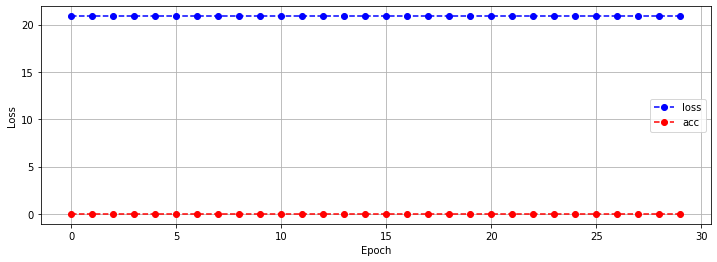

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], 'b--o', label = 'loss')
plt.plot(history.history['accuracy'], 'r--o', label = 'acc')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 73 to 1
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GDP per capita                24 non-null     float64
 1   Social support                24 non-null     float64
 2   Healthy life expectancy       24 non-null     float64
 3   Freedom to make life choices  24 non-null     float64
 4   Generosity                    24 non-null     float64
 5   Perceptions of corruption     24 non-null     float64
dtypes: float64(6)
memory usage: 1.3 KB


In [ ]:
test_Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 73 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Score   24 non-null     float64
dtypes: float64(1)
memory usage: 384.0 bytes


In [ ]:
happiness.evaluate(test_X, test_Y)

1/1 [==============================] - 0s 145ms/step - loss: 19.4209 - accuracy: 0.0000e+00


[19.420907974243164, 0.0]